In [120]:
import numpy as np
correlations = np.load("./correlations_small.npy")

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

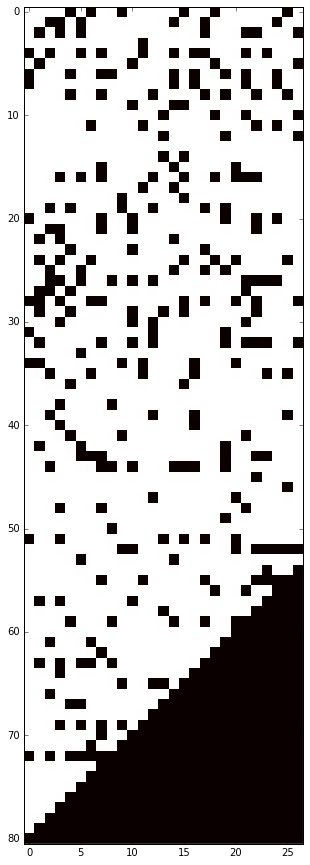

In [135]:
# GPU correlations (symptomatic that the first diagonals (8-blocks) are 0 (== black) always
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(correlations, cmap="hot", interpolation="none")

In [123]:
print("Percentage hits = {0} %".format(100 * np.sum(correlations / (correlations.shape[0] * correlations.shape[1]))))

Percentage hits = 69.86739826245997 %


This is with N = 81, light_crossing_window=27, and block size 3x3

In [124]:
correlations.shape

(81, 27)

In [128]:
correlations_real = np.load("./correlations.npy")

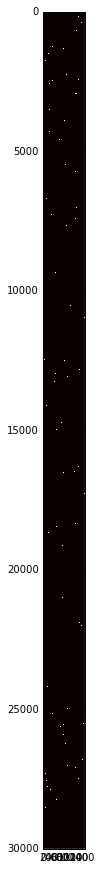

In [129]:
# Ground truth (seems wrong...diagonal not white == 1)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(correlations_real, cmap="hot", interpolation="none")

In [130]:
correlations_real.shape

(30000, 1500)

Percentage of hit correlations

In [132]:
print("Percentage hits = {0} %".format(100 * np.sum(correlations_real / (correlations_real.shape[0] * correlations_real.shape[1]))))

Percentage hits = 0.2075777777777792 %


In [75]:
import numpy as np
np.where(x==0.26774517)

(array([], dtype=int64),)

In [76]:
y[78:]

array([ 0.97411364,  0.18513757,  0.96300459], dtype=float32)

In [77]:
x[78:80]

array([ 0.05691101,  0.80186868], dtype=float32)

In [78]:
import numpy as np
np.where(x==0.87602401)

(array([], dtype=int64),)

In [130]:
np.where(x==0.81775689)

(array([], dtype=int64),)

In [114]:
y[8:16]

array([ 0.49462005,  0.13737926,  0.63217103,  0.88951969,  0.95967758,
        0.93269199,  0.01922691,  0.11102214], dtype=float32)

In [84]:
y[24:]

array([ 0.86980486,  0.95739377,  0.45722562,  0.24933068,  0.79062432,
        0.41660839,  0.2160219 ,  0.20491999,  0.89854044,  0.18462023,
        0.29852843,  0.35963443,  0.6159724 ,  0.72406787,  0.88663906,
        0.8957932 ,  0.95089775,  0.81628722,  0.38464957,  0.09199598,
        0.84929907,  0.89802736,  0.47384384,  0.32334676,  0.68980533,
        0.55929697,  0.85717803,  0.43673065,  0.53199059,  0.61012739,
        0.35549074,  0.21740046,  0.72848731,  0.23121756,  0.0925628 ,
        0.69927949,  0.2881934 ,  0.51331192,  0.0060772 ,  0.86945933], dtype=float32)

In [85]:
z[24:]

array([ 0.19824067,  0.71382284,  0.06260016,  0.73668307,  0.11869724,
        0.11193934,  0.72747481,  0.46255267,  0.81613207,  0.77432835,
        0.20919167,  0.93272632,  0.14098145,  0.77419633,  0.80323517,
        0.90561998,  0.7683695 ,  0.97668117,  0.78336018,  0.56513208,
        0.13854954,  0.80031669,  0.46786216,  0.97926974,  0.51297593,
        0.30397162,  0.32215321,  0.13564816,  0.71447772,  0.33202007,
        0.29784349,  0.80185348,  0.31685761,  0.11355828,  0.39447027,
        0.69777393,  0.06081379,  0.44030124,  0.90970933,  0.02768658], dtype=float32)

In [138]:
y.shape

(81,)

In [139]:
ct.shape

(81,)